In [21]:
import urllib
from io import StringIO
from io import BytesIO
import csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd
import scipy.signal as signal

In [22]:
datos8=pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2008.txt',sep=";")
datos9=pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2009.txt',sep=";")
datos10=pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2009.txt',sep=";")

In [23]:
datos8.columns=['Fecha y falsa', 'falsa y hora', 'Tasa', 'Valor']
datos9.columns=['Fecha y falsa', 'falsa y hora', 'Tasa', 'Valor']
datos10.columns=['Fecha y falsa', 'falsa y hora', 'Tasa', 'Valor']

In [24]:

#D8=datos8
#D9=datos9
#D10=datos10

#datos8=D8
#datos9=D9
#datos10=D10

In [25]:
datos8["Fecha y falsa"]=pd.to_datetime(datos8["Fecha y falsa"],format='%d/%m/%Y %H:%M:%S')
datos8["falsa y hora"]=pd.to_datetime(datos8["falsa y hora"],format='%d/%m/%Y %H:%M:%S')-np.datetime64('1899-12-30')
datos8["Fecha y falsa"]=datos8["Fecha y falsa"]+datos8["falsa y hora"]

datos9["Fecha y falsa"]=pd.to_datetime(datos9["Fecha y falsa"],format='%d/%m/%Y %H:%M:%S')
datos9["falsa y hora"]=pd.to_datetime(datos9["falsa y hora"],format='%d/%m/%Y %H:%M:%S')-np.datetime64('1899-12-30')
datos9["Fecha y falsa"]=datos9["Fecha y falsa"]+datos9["falsa y hora"]

datos10["Fecha y falsa"]=pd.to_datetime(datos10["Fecha y falsa"],format='%d/%m/%Y %H:%M:%S')
datos10["falsa y hora"]=pd.to_datetime(datos10["falsa y hora"],format='%d/%m/%Y %H:%M:%S')-np.datetime64('1899-12-30')
datos10["Fecha y falsa"]=datos10["Fecha y falsa"]+datos10["falsa y hora"]

In [26]:
frames=[datos8,datos9,datos10]
total=pd.concat(frames)

In [27]:
total.columns=['Fecha', 'falsa y hora', 'Tasa', 'Valor']


In [28]:
#TOT=total
DATA=total.drop(['falsa y hora'], axis=1)
DATOS=total.drop(['falsa y hora','Valor'], axis=1)
#Datos=DATA

In [29]:
DATOS['Tasa']=pd.to_numeric(DATOS['Tasa'].str.replace(",","."))

In [30]:
DATOS.set_index(['Fecha'],inplace=True)

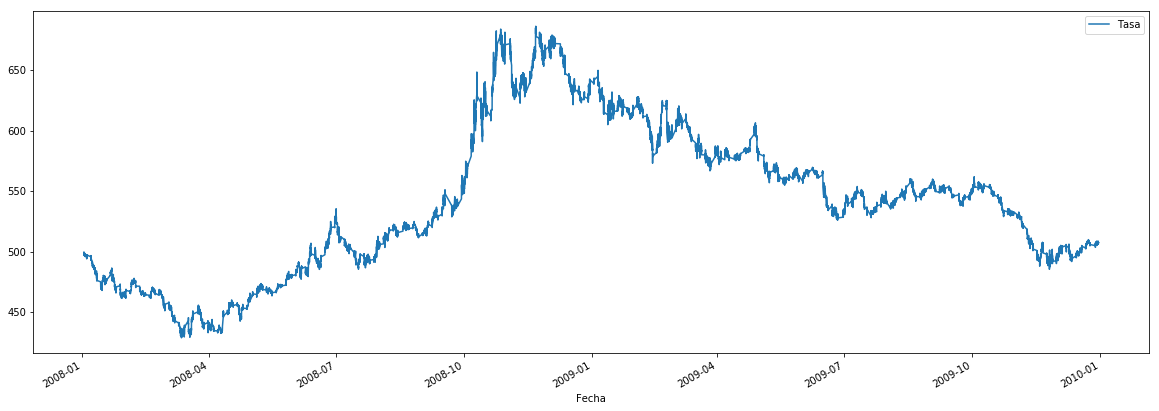

In [31]:
DATOS.plot(figsize=(20,7))
plt.show()

In [32]:
DATOS.to_csv('TorresRafael_datos.csv')

In [33]:
price=DATOS['Tasa']
time=DATA['Fecha']

In [34]:
TIME=time
P=price

In [35]:
TIME=TIME.tolist()

In [36]:
P=P.tolist()


In [37]:
P=np.array(P)

In [38]:
#Filtro
N  = 4    # Orden del filtro
Wn = 0.0002 # Corte de frecuancia
B, A = signal.butter(N, Wn)

In [39]:
P_f= signal.filtfilt(B,A, P)

C:\Users\ralph\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


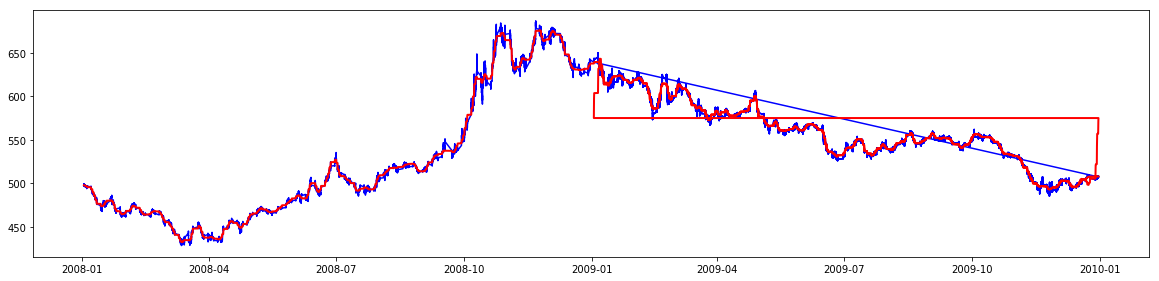

In [44]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
plt.plot(time,price, 'b-')
plt.plot(DATA['Fecha'],P_f, 'r-',linewidth=2)


C:\Users\ralph\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


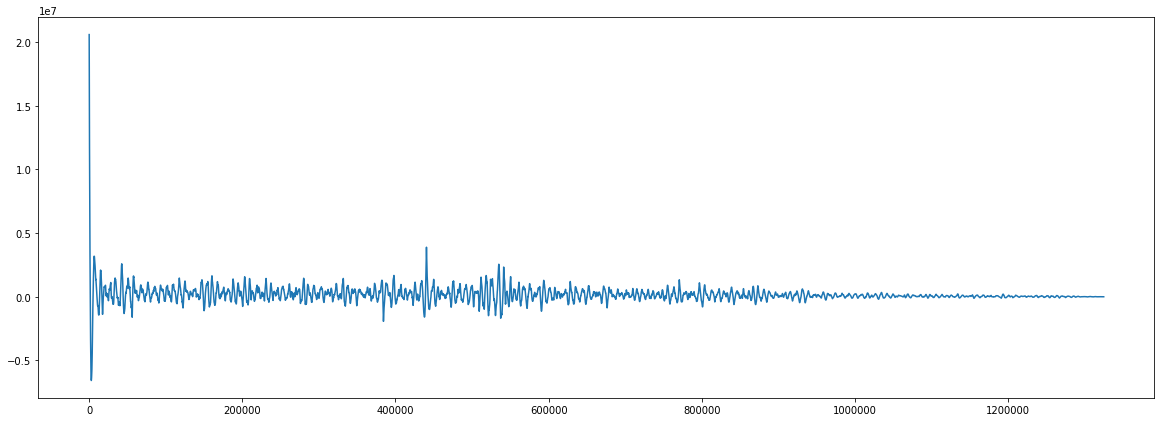

In [43]:

plt.figure(figsize=(20,7))
ruido=P-P_f
corr=signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.show()

In [45]:
print("Despues de probar algunos valores de N y wn, se tiene consistentemente que hay baja correlacion entre los precios. Sin embargo, puede obsrvarse que la serie de preios presenta un componente estacional atenuado. El ruido es aleatorio, esto es, el ajuste es bueno, pero no es facil predecir la serie como un proceso autorregresivo.")

Despues de probar algunos valores de N y wn, se tiene consistentemente que hay baja correlacion entre los precios. Sin embargo, puede obsrvarse que la serie de preios presenta un componente estacional atenuado. El ruido es aleatorio, esto es, el ajuste es bueno, pero no es facil predecir la serie como un proceso autorregresivo.


In [1]:
print("it worked")

it worked
